# Section1：再帰型ニューラルネットワークの概念

## 1.1 全体像
### 1.1.1 RNNとは
時系列データに対応可能なニューラルネットワークである。

### 1.1.2 時系列データとは？
時間的順序を追って一定間隔ごとに観察され、しかも相互に統計的依存関係が認められるようなデータの系列

#### 具体的には？
- 音声データ
- テキストデータ
- 年度ごとの売上データ
- １時間ごとの降水量
- 自然言語

### 1.1.3 RNNについて

#### RNNの数学的記述
\begin{aligned}
  u^t &= W_{(in)} x^t + Wz^{t-1} + b \\[8px]
  z^t &= f\left( W_{(in)} x^t + Wz^{t-1} + b \right) \\[8px]
  v^t &= W_{(out)} z^t + c \\[8px]
  y^t &= g \left(W_{(out)} z^t + c \right)
\end{aligned}

$f$、$g$：活性化関数 \
$u$：活性化関数を通す前の入力×重み \
$z$：$u$を活性化関数を通した後の値 \
$v$：活性化関数を通す前のz×重み \
$y$：$v$を活性化関数を通した後の値

#### RNNの特徴
時系列モデルを扱うには、初期の状態と過去の時間$t-1$の状態を保持し、そこから次の時間での$t$を再帰的に求める再帰構造が必要になる。

### 実装演習

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# 活性化関数の導関数
# シグモイド関数（ロジスティック関数）の導関数
def d_sigmoid(x):
    dx = (1.0 - sigmoid(x)) * sigmoid(x)
    return dx

# 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2

# 平均二乗誤差の導関数
def d_mean_squared_error(d, y):
    if type(d) == np.ndarray:
        batch_size = d.shape[0]
        dx = (y - d)/batch_size
    else:
        dx = y - d
    return dx


iters:0
Loss:1.6660455834089545
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 0 0 0 1 1]
15 + 84 = 255
------------
iters:1000
Loss:0.7879963242787752
Pred:[1 1 0 0 1 1 1 1]
True:[1 0 1 0 1 1 0 1]
103 + 70 = 207
------------
iters:2000
Loss:0.6881599232699033
Pred:[0 1 1 0 0 0 1 0]
True:[1 0 1 0 0 0 1 0]
113 + 49 = 98
------------
iters:3000
Loss:0.5857412470707342
Pred:[0 1 1 1 1 0 1 0]
True:[0 1 0 0 1 0 1 0]
61 + 13 = 122
------------
iters:4000
Loss:0.06714814166763534
Pred:[0 1 1 1 1 0 0 0]
True:[0 1 1 1 1 0 0 0]
56 + 64 = 120
------------
iters:5000
Loss:0.035018123530248614
Pred:[0 0 1 1 1 0 0 0]
True:[0 0 1 1 1 0 0 0]
7 + 49 = 56
------------
iters:6000
Loss:0.006702955566112602
Pred:[1 0 1 1 1 1 1 0]
True:[1 0 1 1 1 1 1 0]
88 + 102 = 190
------------
iters:7000
Loss:0.0033932514306930926
Pred:[1 0 1 1 1 1 1 1]
True:[1 0 1 1 1 1 1 1]
77 + 114 = 191
------------
iters:8000
Loss:0.005099318152418121
Pred:[1 0 0 0 1 1 1 1]
True:[1 0 0 0 1 1 1 1]
31 + 112 = 143
------------
iters:9000
Loss:0.0

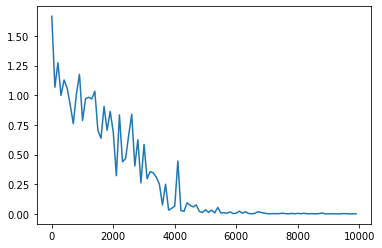

In [14]:
# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = sigmoid(u[:,t+1])

        y[:,t] = sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = d_mean_squared_error(dd, y[:,t]) * d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        if(i % 1000  == 0):
            print("iters:" + str(i))
            print("Loss:" + str(all_loss))
            print("Pred:" + str(out_bin))
            print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
#         if(i % plot_interval  == 0):
        if(i % 1000  == 0):
            print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
            print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## [try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう

### weight_init_std = 1　⇒　weight_init_std = 0.1

iters:0
Loss:1.085785788068883
Pred:[1 1 1 1 1 1 1 1]
True:[0 0 1 0 1 0 0 1]
15 + 26 = 255
------------
iters:1000
Loss:0.8998010524506999
Pred:[1 1 1 1 1 1 1 1]
True:[1 1 0 1 1 1 1 0]
108 + 114 = 255
------------
iters:2000
Loss:1.1494312378825566
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 0 0 1 1 0 0]
67 + 9 = 255
------------
iters:3000
Loss:0.9841089777487666
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 1 1 0 1 0]
104 + 18 = 255
------------
iters:4000
Loss:1.0312511082734332
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 1 0 0 1 1]
38 + 109 = 0
------------
iters:5000
Loss:1.0052051735882577
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 1 0 1 1]
42 + 97 = 0
------------
iters:6000
Loss:1.027487467853446
Pred:[1 1 1 1 1 1 1 1]
True:[1 1 1 0 0 0 0 0]
117 + 107 = 255
------------
iters:7000
Loss:0.9945245440696402
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 0 0 1 1 0]
118 + 80 = 0
------------
iters:8000
Loss:1.0228188518360009
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 0 0 1 1]
100 + 15 = 0
------------
iters:9000
Loss:0.9714230382656215

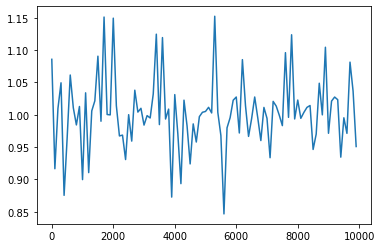

In [17]:
# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 0.1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = sigmoid(u[:,t+1])

        y[:,t] = sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = d_mean_squared_error(dd, y[:,t]) * d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        if(i % 1000  == 0):
            print("iters:" + str(i))
            print("Loss:" + str(all_loss))
            print("Pred:" + str(out_bin))
            print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
#         if(i % plot_interval  == 0):
        if(i % 1000  == 0):
            print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
            print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

### learning_rate = 0.1　⇒　 learning_rate = 0.01

iters:0
Loss:1.394531610103677
Pred:[1 1 1 1 1 0 0 0]
True:[1 0 0 1 0 1 1 1]
125 + 26 = 248
------------
iters:1000
Loss:1.0493675829825122
Pred:[1 1 1 0 1 1 0 1]
True:[0 1 1 1 0 1 1 1]
0 + 119 = 237
------------
iters:2000
Loss:0.8985703349824389
Pred:[0 1 1 1 1 1 0 1]
True:[0 1 1 0 1 0 0 0]
42 + 62 = 125
------------
iters:3000
Loss:1.0563635955039843
Pred:[0 1 1 0 1 1 1 1]
True:[0 1 0 0 0 0 0 0]
11 + 53 = 111
------------
iters:4000
Loss:1.1000984650784411
Pred:[0 1 0 1 1 1 1 1]
True:[1 0 0 0 0 1 0 0]
87 + 45 = 95
------------
iters:5000
Loss:0.8725009050714984
Pred:[1 0 0 0 1 0 0 1]
True:[1 0 1 0 1 0 0 0]
68 + 100 = 137
------------
iters:6000
Loss:1.1101785097832055
Pred:[1 1 0 1 1 1 1 1]
True:[0 1 1 1 0 0 0 0]
3 + 109 = 223
------------
iters:7000
Loss:0.8687749317079112
Pred:[1 1 0 0 0 1 1 1]
True:[1 1 0 1 0 1 1 0]
99 + 115 = 199
------------
iters:8000
Loss:1.2692640405983218
Pred:[0 1 1 1 1 0 0 1]
True:[1 0 0 0 0 1 1 1]
122 + 13 = 121
------------
iters:9000
Loss:0.96739209941

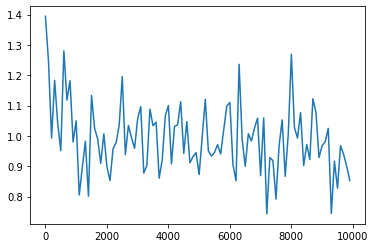

In [16]:
# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.01

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = sigmoid(u[:,t+1])

        y[:,t] = sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = d_mean_squared_error(dd, y[:,t]) * d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        if(i % 1000  == 0):
            print("iters:" + str(i))
            print("Loss:" + str(all_loss))
            print("Pred:" + str(out_bin))
            print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
#         if(i % plot_interval  == 0):
        if(i % 1000  == 0):
            print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
            print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

### hidden_layer_size = 16　⇒　hidden_layer_size = 30

iters:0
Loss:1.4023383597363461
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 0 1 0 1 0]
31 + 75 = 0
------------
iters:1000
Loss:0.9180518706153723
Pred:[1 0 1 1 1 1 0 0]
True:[0 0 0 1 1 1 0 0]
22 + 6 = 188
------------
iters:2000
Loss:1.1028240549259394
Pred:[0 1 1 1 1 0 1 1]
True:[0 1 1 0 0 1 0 0]
57 + 43 = 123
------------
iters:3000
Loss:0.9272309556722146
Pred:[0 0 0 1 0 1 0 1]
True:[0 1 1 1 0 1 1 1]
98 + 21 = 21
------------
iters:4000
Loss:0.15290849250063246
Pred:[0 1 1 0 0 1 1 0]
True:[0 1 1 0 0 1 1 0]
40 + 62 = 102
------------
iters:5000
Loss:0.014529207631134355
Pred:[1 0 1 1 0 1 1 0]
True:[1 0 1 1 0 1 1 0]
70 + 112 = 182
------------
iters:6000
Loss:0.007434831355570654
Pred:[1 0 0 1 1 1 0 0]
True:[1 0 0 1 1 1 0 0]
52 + 104 = 156
------------
iters:7000
Loss:0.002591329066979139
Pred:[1 0 1 1 0 1 1 1]
True:[1 0 1 1 0 1 1 1]
65 + 118 = 183
------------
iters:8000
Loss:0.002162118768301001
Pred:[1 1 0 0 1 1 0 0]
True:[1 1 0 0 1 1 0 0]
96 + 108 = 204
------------
iters:9000
Loss:0.0006

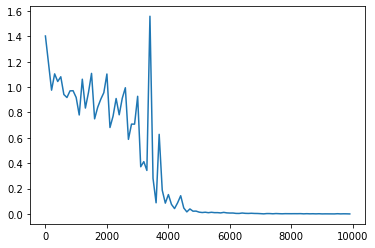

In [20]:
# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 30
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = sigmoid(u[:,t+1])

        y[:,t] = sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = d_mean_squared_error(dd, y[:,t]) * d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        if(i % 1000  == 0):
            print("iters:" + str(i))
            print("Loss:" + str(all_loss))
            print("Pred:" + str(out_bin))
            print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
#         if(i % plot_interval  == 0):
        if(i % 1000  == 0):
            print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
            print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## [try] 重みの初期化方法を変更してみよう
### Xavier

iters:0
Loss:0.9146765685520634
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 0 1 1 0 0]
18 + 58 = 0
------------
iters:1000
Loss:1.0255243876797389
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 0 1 1 0 0 0]
52 + 36 = 255
------------
iters:2000
Loss:0.998057584749708
Pred:[0 0 1 1 1 1 1 1]
True:[0 1 0 0 1 0 1 1]
31 + 44 = 63
------------
iters:3000
Loss:1.1341612915562445
Pred:[0 1 0 0 1 1 0 0]
True:[1 0 0 1 0 0 0 1]
110 + 35 = 76
------------
iters:4000
Loss:1.570707522811029
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 0 0 0 1 1]
21 + 110 = 255
------------
iters:5000
Loss:0.31944799068022894
Pred:[1 1 0 0 1 0 1 0]
True:[1 0 0 0 1 0 1 0]
57 + 81 = 202
------------
iters:6000
Loss:0.049221978262835905
Pred:[0 0 1 0 1 0 0 1]
True:[0 0 1 0 1 0 0 1]
41 + 0 = 41
------------
iters:7000
Loss:0.015641351849603816
Pred:[1 1 0 0 1 0 0 1]
True:[1 1 0 0 1 0 0 1]
94 + 107 = 201
------------
iters:8000
Loss:0.006163453553339904
Pred:[1 0 0 1 1 0 1 1]
True:[1 0 0 1 1 0 1 1]
67 + 88 = 155
------------
iters:9000
Loss:0.00274010385

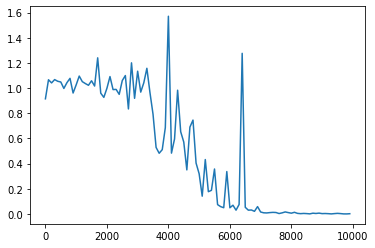

In [28]:
# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
# W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
# W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
# W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))

# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = sigmoid(u[:,t+1])

        y[:,t] = sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = d_mean_squared_error(dd, y[:,t]) * d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        if(i % 1000  == 0):
            print("iters:" + str(i))
            print("Loss:" + str(all_loss))
            print("Pred:" + str(out_bin))
            print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
#         if(i % plot_interval  == 0):
        if(i % 1000  == 0):
            print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
            print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

### He
## [try] 中間層の活性化関数を変更してみよう
### ReLU

In [24]:
# ReLU関数
def relu(x):
    return np.maximum(0, x)

# ReLU関数の導関数
def d_relu(x):
    return np.where( x > 0, 1, 0)
    

iters:0
Loss:10.865350381185731
Pred:[0 0 0 0 0 0 4 0]
True:[0 0 1 0 1 0 0 1]
28 + 13 = 8
------------
iters:1000
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 1 0 1 1 0]
101 + 113 = 0
------------
iters:2000
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 0 1 1 0]
113 + 5 = 0
------------
iters:3000
Loss:3.0
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 1 1 1 1 1]
41 + 118 = 0
------------
iters:4000
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 0 0 1 0]
41 + 73 = 0
------------
iters:5000
Loss:1.5
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 1 0 1 0 0]
83 + 65 = 0
------------
iters:6000
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 1 0 1 1 1]
70 + 17 = 0
------------
iters:7000
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 0 1 0 1 1]
77 + 126 = 0
------------
iters:8000
Loss:1.5
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 0 0 0 0 1]
126 + 67 = 0
------------
iters:9000
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 0 0 1 0]
93 + 21 = 0
------------


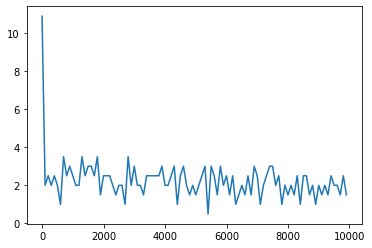

In [27]:
# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
# W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
# W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
# W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier



# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = relu(u[:,t+1])

        y[:,t] = relu(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = d_mean_squared_error(dd, y[:,t]) * d_relu(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_relu(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        if(i % 1000  == 0):
            print("iters:" + str(i))
            print("Loss:" + str(all_loss))
            print("Pred:" + str(out_bin))
            print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
#         if(i % plot_interval  == 0):
        if(i % 1000  == 0):
            print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
            print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## 1.2 BPTT

### 1.2.1 BPTTとは
BPTTとは、RNNにおいてのパラメータ調整方法の一種　⇒　誤差逆伝播の一種

### 1.2.2 BPTTの数学的記述
重み

\begin{aligned}
  \frac{\partial E}{\partial W_{(in)}} = \frac{\partial E}{\partial u^t}
    \left[ 
      \frac{\partial u^t}{\partial W_{(in)}} 
    \right]^T 
  = \delta^t[x^t]^T 
\end{aligned}

\begin{aligned}
  \frac{\partial E}{\partial W_{(out)}} = \frac{\partial E}{\partial v^t}
    \left[
      \frac{\partial v^t}{\partial W_{(out)}}
    \right]^T=
  \delta^{out, t}[z^t]^T
\end{aligned}

\begin{aligned}
  \frac{\partial E}{\partial W}=\frac{\partial E}{\partial u^t}
    \left[
      \frac{\partial u^t}{\partial W}
    \right]^T=
  \delta^t[z^{t-1}]^T
\end{aligned}

バイアス

\begin{aligned}
  \frac{\partial E}{\partial b} = \frac{\partial E}{\partial u^t}
  \frac{\partial u^t}{\partial b} = \delta^t \\[10px]
  \frac{\partial E}{\partial c} = \frac{\partial E}{\partial v^t}
  \frac{\partial v^t}{\partial c} = \delta^{out, t}
\end{aligned}

パラメータ更新
重み
\begin{aligned}
  W_{(in)}^{t+1}=W_{(in)}^t-\epsilon\frac{\partial E}{\partial W_{(in)}}=W_{(in)}^t-\epsilon\sum_{z=0}^{T_t}{\delta^{t-z}[x^{t-z}]^T} \\
  W_{(out)}^{t+1}=W_{(out)}^t-\epsilon\frac{\partial E}{\partial W_{(out)}}=W_{(out)}^t-\epsilon \delta^{out,t}[x^{t}]^T \\
  W^{t+1}=W^t-\epsilon\frac{\partial E}{\partial W}=W^t-\epsilon\sum_{z=0}^{T_t}{\delta^{t-z}[x^{t-z-1}]^T}
\end{aligned}

バイアス
\begin{aligned}
  b^{t+1}=b^t-\epsilon\frac{\partial E}{\partial b}=b^t-\epsilon\sum_{z=0}^{T_t}{\delta^{t-z}} \\
  c^{t+1}=c^t-\epsilon\frac{\partial E}{\partial c}=c^t-\epsilon \delta^{out,t}
\end{aligned}

### 実装演習

# 確認テスト

### P11 
問） \
サイズ５×５の入力画像を、サイズ３×３のフィルタで畳み込んだ時の出力画像のサイズを答えよ。 \
なお、ストライドは２、パディングは１とする。

答） \
（５＋２×１－３）／２＋１＝４／２＋１＝３

出力画像は３×３

### P23
問） \
RNNのネットワークには大きくわけて3つの重みがある。 \
1つは入力から現在の中間層を定義する際にかけられる重み、1つは中間層から出力を定義する際にかけられる重みである。 \
残り1つの重みについて説明せよ。

答） 
- ひとつ前の重みからの重み（中間層から中間層へ至るところの重み）

#### P36
問） \
連鎖律の原理を使い、$\frac{dz}{dx}$を求めよ。

\begin{aligned}
  z &= t^2 \\
  t &= x + y
\end{aligned}

答）
\begin{aligned}
  \frac{dz}{dt} &= 2t \\[8px]
  \frac{dt}{dx} &= 1 \\[8px]
  \frac{dz}{dx} &= \frac{dz}{dt}\frac{dt}{dx} \\[8px]
  &= 2t \\[8px]
  &= 2 ( x + y )
\end{aligned}

#### P45
問）
下図の$y_1$を$x$・$z_0$・$z_1$・$w_{in}$・$w$・$w_{out}$を用いて数式で表せ。 \
※バイアスは任意の文字で定義せよ。 \
※また中間層の出力にシグモイド関数$g(x)$を作用させよ。

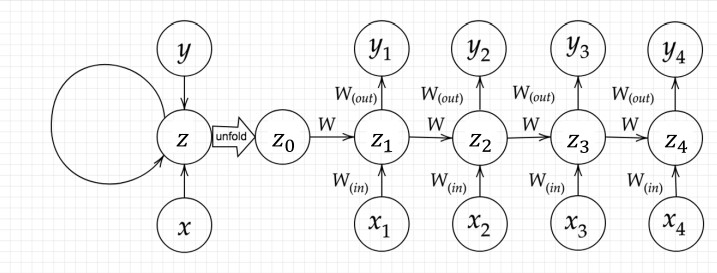

In [1]:
from IPython.display import Image
Image("./Section1_確認テスト3.jpg")

答） \
\begin{aligned}
  z_1 &= f\left( W_{in} \cdot x_1 + W \cdot z_0 + b \right) \\[8px]
  y_1 &= g\left( W_{out} \cdot z_1 + c \right)
\end{aligned}